In [1]:
import cv2
import numpy as np

In [2]:
image = cv2.imread('maxresdefault.jpg')

image = np.float32(image[:, :, ::-1] / 255.); # bgr

In [3]:
from matplotlib import pyplot as plt

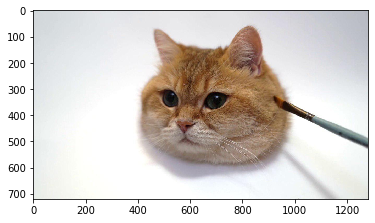

In [4]:
plt.imshow(image);

In [5]:
gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)

In [6]:
gx.shape, gy.shape

((720, 1280, 3), (720, 1280, 3))

In [7]:
magnitude = np.sqrt(gx ** 2 + gy ** 2)

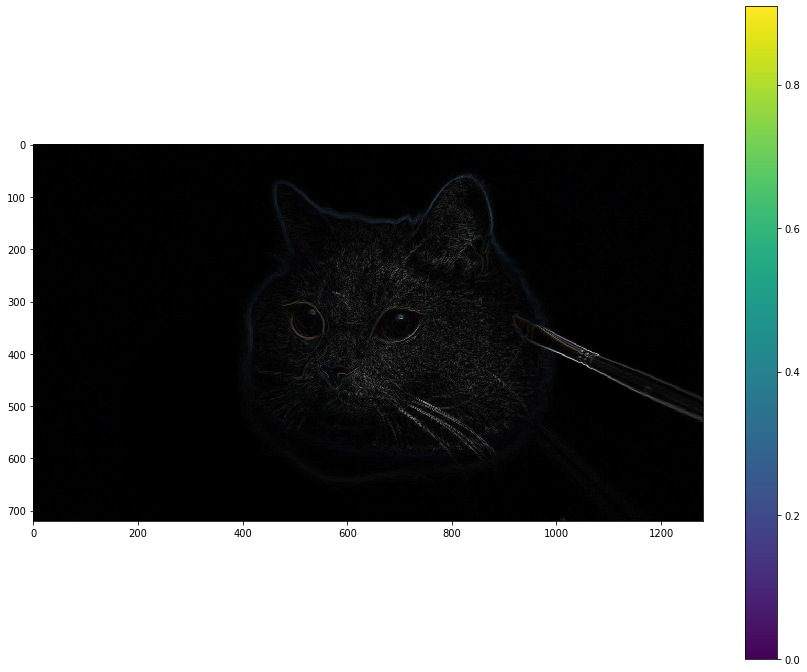

In [8]:
plt.figure(figsize=(15, 12))
plt.imshow(magnitude)
plt.colorbar();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


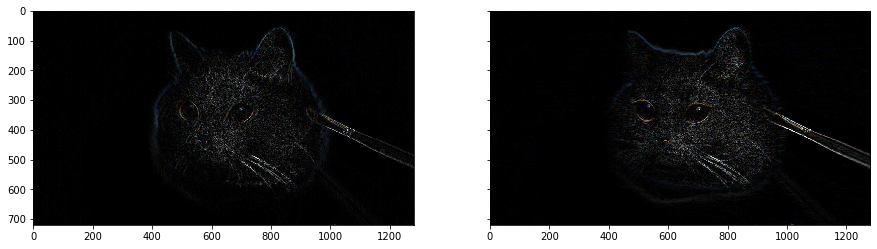

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 12))
ax[0].imshow(np.abs(gx) * 2)
ax[1].imshow(np.abs(gy) * 2);

In [10]:
angle = np.arctan2(gy, gx)

angle[angle < 0] += np.pi

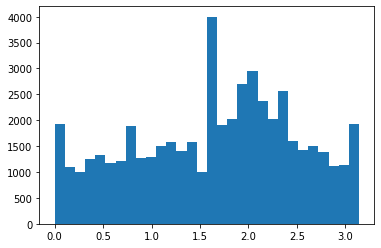

In [11]:
plt.hist(angle.reshape(-1), weights=magnitude.reshape(-1), bins=30);

## HOG classifier

In [12]:
from sklearn.datasets import load_digits

In [13]:
digits = load_digits()

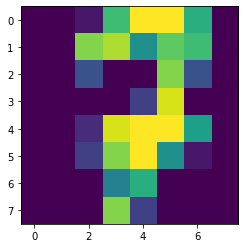

In [14]:
plt.imshow(digits['images'][300])

In [15]:
BINS = 30

In [16]:
def compute_hog(digit, bins=BINS):
    gx = cv2.Sobel(digit, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(digit, cv2.CV_32F, 0, 1, ksize=1)
    magnitude = np.sqrt(gx ** 2 + gy ** 2)
    angle = np.arctan2(gy, gx)
    angle[angle < 0] += np.pi
    hog, _ = np.histogram(angle, bins=bins, weights=magnitude)
    return hog

In [17]:
compute_hog(np.float32(digits['images'][300]))

array([80.       , 15.297058 , 14.3178215,  0.       , 13.416408 ,
        0.       , 34.835636 , 72.8679   , 19.851845 ,  0.       ,
       26.84787  ,  0.       , 14.56022  , 31.421574 , 13.038404 ,
       16.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  8.485281 ,  0.       , 15.264338 ,
        0.       , 37.35555  ,  0.       , 13.152946 , 54.03122  ],
      dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(digits['images'], digits['target'], test_size=0.2)

In [20]:
centroids = np.zeros((10, BINS))
images_in_class = [0] * 10

In [21]:
for image, label in zip(X_train, y_train):
    centroids[label] += compute_hog((image / 16.).astype(np.float32))
    images_in_class[label] += 1

In [22]:
centroids = centroids / np.array(images_in_class)[:, None]

In [23]:
predictions = []

In [24]:
for image in X_test:
    hog = compute_hog((image / 16.).astype(np.float32), BINS)
    distance_to_centroid = np.linalg.norm(centroids - hog, axis=1)
    predictions.append(np.argmin(distance_to_centroid))

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(predictions, y_test)

0.5111111111111111